In [1]:
##import lib and data
import pandas as pd
import numpy as np
data = pd.read_csv('./business_record.csv')

In [2]:
data.head()

,id,entityid,transactionid,user_id,car_id,type,start_time,start_lng,start_lat,end_lng,...,refund_status,is_allow_refund,map_start_lng,map_start_lat,map_end_lng,map_end_lat,fine,discount,remark,valid
0,94156,18,7e5ce163-97a7-4f60-b3fe-33f57adddba3,13121,76,2,2016/6/3 10:13,108.750894,34.014670,108.747022,...,0,0,108.762144,34.019072,108.758242,34.018975,0,0,NaN,0
1,103293,18,46424d53-8fd5-4ecd-90b1-787f7eb2ddbc,11473,70,2,2016/7/2 20:54,108.745663,34.016955,108.745668,...,0,0,108.756871,34.021444,108.756882,34.021441,0,0,NaN,0
2,98452,18,480ccc50-8fff-40ae-ab8b-7bae9b4ff559,25927,70,2,2016/6/19 12:43,108.749987,34.013616,108.749987,...,0,0,108.761224,34.018033,108.761233,34.018033,0,0,NaN,0
3,90155,18,5553a975-d990-47a1-b74e-d20637e0d7bf,27776,70,2,2016/5/17 22:01,108.745447,34.017462,108.745630,...,0,0,108.756652,34.021955,108.756847,34.021932,0,0,NaN,0
4,99609,18,8af22de4-095b-421f-9927-a411d3ecd54d,19927,76,2,2016/6/22 17:40,108.746764,34.014425,108.746764,...,0,0,108.757982,34.018888,108.757990,34.018890,0,0,NaN,0


In [3]:
data.columns

Index(['id', 'entityid', 'transactionid', 'user_id', 'car_id', 'type',
       'start_time', 'start_lng', 'start_lat', 'end_lng', 'end_lat',
       'end_time', 'current_miles', 'stoptime', 'cost', 'moeny', 'bonus',
       'stop_time_count', 'point', 'speed_max', 'speed_avg', 'refund_status',
       'is_allow_refund', 'map_start_lng', 'map_start_lat', 'map_end_lng',
       'map_end_lat', 'fine', 'discount', 'remark', 'valid'],
      dtype='object')

In [4]:
#choose useful feature
data = data[['user_id','start_time','end_time','current_miles','bonus']]

In [5]:
data.head()

,user_id,start_time,end_time,current_miles,bonus
0,13121,2016/6/3 10:13,2016/6/3 16:29,4225,1.0
1,11473,2016/7/2 20:54,2016/7/2 20:56,9,0.0
2,25927,2016/6/19 12:43,2016/6/19 12:56,0,1.0
3,27776,2016/5/17 22:01,2016/5/17 22:04,84,0.0
4,19927,2016/6/22 17:40,2016/6/22 17:48,1,0.0


In [6]:
##construct feature: F=count;
df = pd.DataFrame()
data['F'] = 1
df['F'] = data.groupby('user_id')['F'].aggregate('sum')

In [7]:
#统计用户在时间窗口内驾驶次数
df.head()

,F
user_id,
1939,10
2084,6
3117,2
5228,1
7355,1


In [8]:
##construct feature:  M=SUM(current_miles)
df['M'] = data.groupby('user_id')['current_miles'].aggregate('sum')

In [9]:
df.head()

,F,M
user_id,,
1939,10,0
2084,6,0
3117,2,35
5228,1,0
7355,1,0


In [10]:
##construct feature: D=AVG(bonus);
df['D'] = data.groupby('user_id')['bonus'].aggregate('mean')

In [11]:
df.head()

,F,M,D
user_id,,,
1939,10,0,0.00
2084,6,0,0.00
3117,2,35,0.75
5228,1,0,0.00
7355,1,0,0.00


In [12]:
##construct feature:  L=load_time-start_time; R=load_time-end_time; set load time = 2017.1.15
df['min_start_time'] = data.groupby("user_id")["start_time"].aggregate(np.min)
df['max_end_time'] = data.groupby("user_id")["start_time"].aggregate(np.max)

In [13]:
df.head()

,F,M,D,min_start_time,max_end_time
user_id,,,,,
1939,10,0,0.00,2015/10/24 18:34,2016/1/7 16:45
2084,6,0,0.00,2015/12/10 10:51,2015/12/2 16:43
3117,2,35,0.75,2015/10/18 13:24,2015/10/20 12:53
5228,1,0,0.00,2015/12/15 16:04,2015/12/15 16:04
7355,1,0,0.00,2016/12/28 9:44,2016/12/28 9:44


In [14]:
##transfer type of min_start_time and max_end_time to datetime style
#copy
cnt_srs = df
cnt_srs['min_start_time'] = pd.to_datetime(cnt_srs['min_start_time'])

In [15]:
cnt_srs['max_end_time'] = pd.to_datetime(cnt_srs['max_end_time'])
cnt_srs.head()

,F,M,D,min_start_time,max_end_time
user_id,,,,,
1939,10,0,0.00,2015-10-24 18:34:00,2016-01-07 16:45:00
2084,6,0,0.00,2015-12-10 10:51:00,2015-12-02 16:43:00
3117,2,35,0.75,2015-10-18 13:24:00,2015-10-20 12:53:00
5228,1,0,0.00,2015-12-15 16:04:00,2015-12-15 16:04:00
7355,1,0,0.00,2016-12-28 09:44:00,2016-12-28 09:44:00


In [16]:
##remove hour min sec
cnt_srs['min_start_time'] = cnt_srs.min_start_time.apply(lambda x: str(x)[:10])
cnt_srs['max_end_time'] = cnt_srs.max_end_time.apply(lambda x: str(x)[:10])

In [17]:
cnt_srs.head()

,F,M,D,min_start_time,max_end_time
user_id,,,,,
1939,10,0,0.00,2015-10-24,2016-01-07
2084,6,0,0.00,2015-12-10,2015-12-02
3117,2,35,0.75,2015-10-18,2015-10-20
5228,1,0,0.00,2015-12-15,2015-12-15
7355,1,0,0.00,2016-12-28,2016-12-28


In [18]:
##construct load_time
cnt_srs['load_time'] = pd.datetime(2017,1,15)

In [19]:
cnt_srs.head()

,F,M,D,min_start_time,max_end_time,load_time
user_id,,,,,,
1939,10,0,0.00,2015-10-24,2016-01-07,2017-01-15
2084,6,0,0.00,2015-12-10,2015-12-02,2017-01-15
3117,2,35,0.75,2015-10-18,2015-10-20,2017-01-15
5228,1,0,0.00,2015-12-15,2015-12-15,2017-01-15
7355,1,0,0.00,2016-12-28,2016-12-28,2017-01-15


In [20]:
cnt_srs.load_time

user_id
1939    2017-01-15
2084    2017-01-15
3117    2017-01-15
5228    2017-01-15
7355    2017-01-15
8002    2017-01-15
8274    2017-01-15
11387   2017-01-15
11401   2017-01-15
11439   2017-01-15
11440   2017-01-15
11441   2017-01-15
11455   2017-01-15
11457   2017-01-15
11461   2017-01-15
11462   2017-01-15
11466   2017-01-15
11468   2017-01-15
11471   2017-01-15
11472   2017-01-15
11473   2017-01-15
11478   2017-01-15
11480   2017-01-15
11481   2017-01-15
11482   2017-01-15
11485   2017-01-15
11486   2017-01-15
11487   2017-01-15
11488   2017-01-15
11492   2017-01-15
           ...    
46929   2017-01-15
46930   2017-01-15
46931   2017-01-15
46932   2017-01-15
46933   2017-01-15
46934   2017-01-15
46935   2017-01-15
46940   2017-01-15
46950   2017-01-15
46951   2017-01-15
46958   2017-01-15
46959   2017-01-15
46964   2017-01-15
46965   2017-01-15
46968   2017-01-15
46985   2017-01-15
46986   2017-01-15
46990   2017-01-15
46991   2017-01-15
46995   2017-01-15
46999   2017-01-15
4701

In [21]:
##construct feature:  L=load_time-start_time; R=load_time-end_time; set load time = 2017.1.15
##load_time:datetime64;   min_start_time:object
##transfer object to datetime
cnt_srs['min_start_time'] = pd.to_datetime(cnt_srs['min_start_time'])
cnt_srs['max_end_time'] = pd.to_datetime(cnt_srs['max_end_time'])
cnt_srs['L'] = cnt_srs['load_time'] - cnt_srs['min_start_time']
cnt_srs['R'] = cnt_srs['load_time'] - cnt_srs['max_end_time']
cnt_srs.head()

,F,M,D,min_start_time,max_end_time,load_time,L,R
user_id,,,,,,,,
1939,10,0,0.00,2015-10-24,2016-01-07,2017-01-15,449 days,374 days
2084,6,0,0.00,2015-12-10,2015-12-02,2017-01-15,402 days,410 days
3117,2,35,0.75,2015-10-18,2015-10-20,2017-01-15,455 days,453 days
5228,1,0,0.00,2015-12-15,2015-12-15,2017-01-15,397 days,397 days
7355,1,0,0.00,2016-12-28,2016-12-28,2017-01-15,18 days,18 days


In [22]:
L =np.int64(cnt_srs.L)/86400000000000
R = np.int64(cnt_srs.R)/86400000000000

In [23]:
df['L'] = L
df['R'] = R
df = df[['L','R','F','M','D']]

In [24]:
df.head()

,L,R,F,M,D
user_id,,,,,
1939,449.0,374.0,10,0,0.00
2084,402.0,410.0,6,0,0.00
3117,455.0,453.0,2,35,0.75
5228,397.0,397.0,1,0,0.00
7355,18.0,18.0,1,0,0.00


In [27]:
##remove  outlier ;such as M==0(count = 341)
np.shape(df[df.M==0])

(341, 5)

In [28]:
df = df[df.M!=0]

In [32]:
##using k-means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
feature = ['L','R','F','M','D']
input_data = df[feature]
##normalization
def autoNorm(dataSet):  
    minVals = dataSet.min(0)  
    maxVals = dataSet.max(0)  
    ranges = maxVals - minVals  
    normDataSet = np.zeros(np.shape(dataSet))  
    m = dataSet.shape[0]  
    normDataSet = dataSet - np.tile(minVals, (m,1))  
    normDataSet = normDataSet/np.tile(ranges, (m,1))   #element wise divide  
    return normDataSet
normDataSet = autoNorm(input_data)

In [33]:
normDataSet.head()

,L,R,F,M,D
user_id,,,,,
3117,1.000000,1.000000,0.002717,0.000142,0.375000
11387,0.993333,0.399554,0.127717,0.032425,0.200000
11401,0.971111,0.055804,0.038043,0.034213,0.303333
11439,0.982222,0.412946,0.035326,0.033567,0.107143
11440,0.991111,0.412946,0.027174,0.031734,0.136364


In [34]:
#default k = 5,init = k-mean++
num_clusters = 5 
clf = KMeans(n_clusters=num_clusters,  n_init=1, verbose=1)  
clf.fit(normDataSet)  

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 221.312921597
start iteration
done sorting
end inner loop
Iteration 1, inertia 204.319815558
start iteration
done sorting
end inner loop
Iteration 2, inertia 192.686270221
start iteration
done sorting
end inner loop
Iteration 3, inertia 184.040765458
start iteration
done sorting
end inner loop
Iteration 4, inertia 171.106163154
start iteration
done sorting
end inner loop
Iteration 5, inertia 167.365000209
start iteration
done sorting
end inner loop
Iteration 6, inertia 167.067612499
start iteration
done sorting
end inner loop
Iteration 7, inertia 167.036477634
start iteration
done sorting
end inner loop
Iteration 8, inertia 167.025624983
start iteration
done sorting
end inner loop
Iteration 9, inertia 167.025624983
center shift 0.000000e+00 within tolerance 6.330356e-06


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [36]:
clf.labels_

array([2, 3, 3, ..., 1, 1, 1])

In [37]:
clf.cluster_centers_

array([[  7.01365818e-01,   6.89146298e-01,   8.12509028e-04,
          6.69060711e-03,   9.34426910e-01],
       [  9.88822355e-02,   5.43177039e-02,   3.90713139e-02,
          4.17593098e-02,   2.21689226e-02],
       [  9.18868012e-01,   8.65936288e-01,   1.47272397e-02,
          1.40433367e-02,   2.54125654e-01],
       [  9.17169844e-01,   3.38150668e-01,   9.48608964e-02,
          9.54864743e-02,   1.64858831e-01],
       [  4.31129864e-01,   4.60910815e-01,   2.83548890e-02,
          3.18716116e-02,   2.60503572e-01]])

In [44]:
data_arrary  = np.array(normDataSet)

In [46]:
data_arrary

array([[  1.00000000e+00,   1.00000000e+00,   2.71739130e-03,
          1.41686149e-04,   3.75000000e-01],
       [  9.93333333e-01,   3.99553571e-01,   1.27717391e-01,
          3.24252918e-02,   2.00000000e-01],
       [  9.71111111e-01,   5.58035714e-02,   3.80434783e-02,
          3.42130376e-02,   3.03333333e-01],
       ..., 
       [  2.22222222e-03,   2.23214286e-03,   0.00000000e+00,
          3.66717090e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.78371609e-03,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.97971388e-03,   0.00000000e+00]])

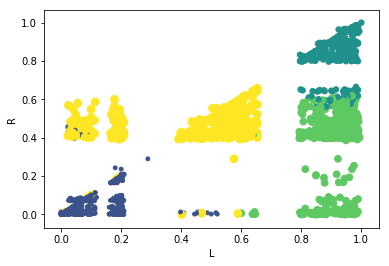

In [52]:
##plot
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_arrary[:,0],data_arrary[:,1],15.0*clf.labels_,15*clf.labels_)"""选前两列值作为坐标"""
plt.xlabel("L")
plt.ylabel("R")
plt.show()